# Imports

In [ ]:
from IPython.display import clear_output

!pip install pyprind

clear_output()

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
import matplotlib.pyplot as plt


import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import gzip

import os
import glob
import time
import random
import gc
import json
import copy
import pyprind
import tqdm
from dataclasses import dataclass, field
from typing import Union, List, Dict, Any, Optional, cast

import torch
import torchvision
import torchtext

from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

# Introduction to PyTorch

In [ ]:
x = torch.tensor([1,2,3,4,5])
print(x)

tensor([1, 2, 3, 4, 5])


In [ ]:
x = np.arange(100)
print(type(x))

x = torch.tensor(x)
print(type(x))
print(x.size())

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
torch.Size([100])


## Resizing Tensors

In [ ]:
x = torch.arange(105)
print(x)
print(x.size())

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104])
torch.Size([105])


In [ ]:
y = x.reshape((5, 21))
print(y)

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20],
        [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
          35,  36,  37,  38,  39,  40,  41],
        [ 42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62],
        [ 63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
          77,  78,  79,  80,  81,  82,  83],
        [ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104]])


In [ ]:
z = x.reshape((5, 3, 7))
print(z)

tensor([[[  0,   1,   2,   3,   4,   5,   6],
         [  7,   8,   9,  10,  11,  12,  13],
         [ 14,  15,  16,  17,  18,  19,  20]],

        [[ 21,  22,  23,  24,  25,  26,  27],
         [ 28,  29,  30,  31,  32,  33,  34],
         [ 35,  36,  37,  38,  39,  40,  41]],

        [[ 42,  43,  44,  45,  46,  47,  48],
         [ 49,  50,  51,  52,  53,  54,  55],
         [ 56,  57,  58,  59,  60,  61,  62]],

        [[ 63,  64,  65,  66,  67,  68,  69],
         [ 70,  71,  72,  73,  74,  75,  76],
         [ 77,  78,  79,  80,  81,  82,  83]],

        [[ 84,  85,  86,  87,  88,  89,  90],
         [ 91,  92,  93,  94,  95,  96,  97],
         [ 98,  99, 100, 101, 102, 103, 104]]])


In [ ]:
w = x.view((3, 35))
print(w)

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34],
        [ 35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
          49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
          63,  64,  65,  66,  67,  68,  69],
        [ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104]])


When to use `Tensor.view` and when to use `Tensor.reshape`?

`Tensor.view` works only when the tensor is contiguous. Where as `Tensor.reshape` (may) creates a new instance of the tensor and therefore can be used universally.

### Permute

In [ ]:
w = z.permute((1, 0, 2))
print(w)
print(w.size())

tensor([[[  0,   1,   2,   3,   4,   5,   6],
         [ 21,  22,  23,  24,  25,  26,  27],
         [ 42,  43,  44,  45,  46,  47,  48],
         [ 63,  64,  65,  66,  67,  68,  69],
         [ 84,  85,  86,  87,  88,  89,  90]],

        [[  7,   8,   9,  10,  11,  12,  13],
         [ 28,  29,  30,  31,  32,  33,  34],
         [ 49,  50,  51,  52,  53,  54,  55],
         [ 70,  71,  72,  73,  74,  75,  76],
         [ 91,  92,  93,  94,  95,  96,  97]],

        [[ 14,  15,  16,  17,  18,  19,  20],
         [ 35,  36,  37,  38,  39,  40,  41],
         [ 56,  57,  58,  59,  60,  61,  62],
         [ 77,  78,  79,  80,  81,  82,  83],
         [ 98,  99, 100, 101, 102, 103, 104]]])
torch.Size([3, 5, 7])


In [ ]:
w = torch.moveaxis(z, 1, 0)
print(w)
print(w.size())

tensor([[[  0,   1,   2,   3,   4,   5,   6],
         [ 21,  22,  23,  24,  25,  26,  27],
         [ 42,  43,  44,  45,  46,  47,  48],
         [ 63,  64,  65,  66,  67,  68,  69],
         [ 84,  85,  86,  87,  88,  89,  90]],

        [[  7,   8,   9,  10,  11,  12,  13],
         [ 28,  29,  30,  31,  32,  33,  34],
         [ 49,  50,  51,  52,  53,  54,  55],
         [ 70,  71,  72,  73,  74,  75,  76],
         [ 91,  92,  93,  94,  95,  96,  97]],

        [[ 14,  15,  16,  17,  18,  19,  20],
         [ 35,  36,  37,  38,  39,  40,  41],
         [ 56,  57,  58,  59,  60,  61,  62],
         [ 77,  78,  79,  80,  81,  82,  83],
         [ 98,  99, 100, 101, 102, 103, 104]]])
torch.Size([3, 5, 7])


### Flatten

In [ ]:
print(w.size())

u = torch.flatten(w, 1, 2)
print(u.size())

torch.Size([3, 5, 7])
torch.Size([3, 35])


In [ ]:
print(u)

tensor([[  0,   1,   2,   3,   4,   5,   6,  21,  22,  23,  24,  25,  26,  27,
          42,  43,  44,  45,  46,  47,  48,  63,  64,  65,  66,  67,  68,  69,
          84,  85,  86,  87,  88,  89,  90],
        [  7,   8,   9,  10,  11,  12,  13,  28,  29,  30,  31,  32,  33,  34,
          49,  50,  51,  52,  53,  54,  55,  70,  71,  72,  73,  74,  75,  76,
          91,  92,  93,  94,  95,  96,  97],
        [ 14,  15,  16,  17,  18,  19,  20,  35,  36,  37,  38,  39,  40,  41,
          56,  57,  58,  59,  60,  61,  62,  77,  78,  79,  80,  81,  82,  83,
          98,  99, 100, 101, 102, 103, 104]])


In [ ]:
print(w.size())

u = torch.flatten(w)
print(u.size())

torch.Size([3, 5, 7])
torch.Size([105])


In [ ]:
print(u)

tensor([  0,   1,   2,   3,   4,   5,   6,  21,  22,  23,  24,  25,  26,  27,
         42,  43,  44,  45,  46,  47,  48,  63,  64,  65,  66,  67,  68,  69,
         84,  85,  86,  87,  88,  89,  90,   7,   8,   9,  10,  11,  12,  13,
         28,  29,  30,  31,  32,  33,  34,  49,  50,  51,  52,  53,  54,  55,
         70,  71,  72,  73,  74,  75,  76,  91,  92,  93,  94,  95,  96,  97,
         14,  15,  16,  17,  18,  19,  20,  35,  36,  37,  38,  39,  40,  41,
         56,  57,  58,  59,  60,  61,  62,  77,  78,  79,  80,  81,  82,  83,
         98,  99, 100, 101, 102, 103, 104])


## Operations

In [ ]:
# Suppose you want to add one to every element of the array

x = x + 1

print(x)

tensor([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105])


In [ ]:
x = x + x

print(x)

tensor([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,  28,
         30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,
         58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
         86,  88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110, 112,
        114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140,
        142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168,
        170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196,
        198, 200, 202, 204, 206, 208, 210])


In [ ]:
x = x * 2

print(x)

tensor([  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,  56,
         60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108, 112,
        116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168,
        172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216, 220, 224,
        228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268, 272, 276, 280,
        284, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328, 332, 336,
        340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392,
        396, 400, 404, 408, 412, 416, 420])


### Multiplying two Arrays

In [ ]:
x = torch.randint(low=1, high=3, size=(2, 3))
print(x)

tensor([[2, 1, 1],
        [2, 2, 1]])


In [ ]:
y = torch.randint(low=1, high=3, size=(2, 3))
print(y)

tensor([[1, 1, 1],
        [2, 1, 2]])


In [ ]:
z = x*y
print(z)

tensor([[2, 1, 1],
        [4, 2, 2]])


---

In [ ]:
print(x.size())
print(y.size())


z = torch.matmul(x, y.T)

print(z)
print(z.size())

torch.Size([2, 3])
torch.Size([2, 3])
tensor([[4, 7],
        [5, 8]])
torch.Size([2, 2])


In [ ]:
print(x.size())
print(y.size())


z = x@y.T

print(z)
print(z.size())

torch.Size([2, 3])
torch.Size([2, 3])
tensor([[4, 7],
        [5, 8]])
torch.Size([2, 2])


### Maximum Element in a Tensor

In [ ]:
x = torch.randint(low=1, high=500, size=(100,))
print(x)

print(torch.max(x))
print(torch.argmax(x))

tensor([282, 138, 112, 396,  52, 428, 170, 287, 362, 482,   9, 403, 294, 363,
        313, 233, 315, 242, 407, 288, 226, 346, 216, 216, 191, 135, 106,  73,
        156, 133, 240, 355, 396, 454,  99, 177, 389, 304, 234, 126, 285, 362,
        374, 127, 191, 418, 421, 456, 159, 248, 438, 205, 288, 150, 412, 197,
        474, 106, 200, 360, 477, 150, 111, 259, 292, 238, 456, 252,  38, 165,
        126, 435, 288, 429,  38, 327, 464, 200, 473, 360, 240, 334, 186,  13,
        252, 279, 196,  99, 133, 407, 257, 307,  29, 199, 275, 162, 387, 128,
        295, 131])
tensor(482)
tensor(9)


In [ ]:
print(x[21])

tensor(346)


In [ ]:
x = torch.randint(low=1, high=500, size=(100,)).view(10, 10)
print(x)

print(torch.max(x, dim=1).values)
print(torch.argmax(x, dim=1))

tensor([[346, 369, 108, 378, 451, 276, 199,  32,  28, 105],
        [ 39, 135,  63, 385,  43, 235,  87, 473,  93,  44],
        [278, 464, 132, 107,  58,  89, 326, 296,  63, 240],
        [222, 136, 248, 343, 223,  39, 431,  96,  64,  22],
        [ 33, 166, 466, 322, 255, 481, 498,  58, 431, 207],
        [484, 389, 196, 299, 190,  15, 278, 144, 480,  94],
        [375,  83, 117, 354,  83,  64, 315, 358,  32, 258],
        [139,  93, 154,  16, 269, 226,  33, 294, 188, 457],
        [215, 241,  74, 364,  53,  91, 280, 158,  36, 116],
        [489, 369, 472, 342, 238,  67, 134, 137,  95,  17]])
tensor([451, 473, 464, 431, 498, 484, 375, 457, 364, 489])
tensor([4, 7, 1, 6, 6, 0, 0, 9, 3, 0])


# Introduction to Convolutional Neural Networks

# Data Processing

In [ ]:
# !wget

In [ ]:
!gdown --id 1oYnD7Izl3LVVzjEMyLxLklX30TKWHgGG
!unzip /content/cifar-10.zip
!rm -rf /content/cifar-10.zip
!mv /content/cifar-10/sample_submission.csv /content/cifar-10/test_labels.csv

clear_output()

In [ ]:
def process():
    data = pd.read_csv(os.path.join('/content/cifar-10', 'train_labels.csv'))
    encoder = preprocessing.LabelEncoder()
    encoder.fit(data['label'])
    return encoder

encoder = process()

In [ ]:
data = pd.read_csv(os.path.join('/content/cifar-10', 'train_labels.csv'))
files = data['id']
labels = encoder.transform(data['label'])

train_data_files, valid_data_files, train_data_label, valid_data_label = train_test_split(files, labels, test_size=0.1, shuffle=True, stratify=labels)

train_data = pd.DataFrame({'id': train_data_files, 'label': train_data_label})
valid_data = pd.DataFrame({'id': valid_data_files, 'label': valid_data_label})

unique, counts = np.unique(labels, return_counts=True)
weights = torch.Tensor(sklearn.utils.class_weight.compute_class_weight(class_weight="balanced", classes=unique, y=np.asarray(labels)))

In [ ]:
data = pd.read_csv(os.path.join('/content/cifar-10', 'test_labels.csv'))
test_data_files = data['id']
test_data_label = encoder.transform(data['label'])

test_data = pd.DataFrame({'id': test_data_files, 'label': test_data_label})

# Training Parameters

In [ ]:
@dataclass
class TrainingArgs():

    seed: int = 17
    lr: float = 3e-4
    batch_size: int = 64
    num_workers: int = os.cpu_count()
    max_epochs: str = 10
    device: torch.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    img_size: int = 32

    root_dir: str = '/content/cifar-10'
    train_file: dict = train_data
    valid_file: dict = valid_data
    test_file: dict = test_data
    data: tuple = ()
    checkpoint: str = '/content/'

    project_name: str = 'CIFAR10'

args = TrainingArgs()

# Data Loading

In [ ]:
class CreateDataset(torch.utils.data.Dataset):
    def __init__(self, args, mode='train'):
        self.args = args
        self.mode = mode

        if mode=='train':
            self.entry = self.args.train_file
        elif mode=='valid':
            self.entry = self.args.valid_file
            self.mode = 'train'
        elif mode=='test':
            self.entry = self.args.test_file    

        self.transform = torchvision.transforms.Compose(
            [
                transforms.ToTensor(),
                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
            ]
        )

    def __getitem__(self, index):
        data = self.entry.iloc[index]
        file_name = os.path.join(self.args.root_dir, self.mode, str(data['id'])+'.png')
        image = Image.open(file_name)
        image = self.transform(image)
        label = data['label']
        return image, label

    def __len__(self):
        return len(self.entry)

---

In [ ]:
train_dataset = CreateDataset(args, mode='train')
valid_dataset = CreateDataset(args, mode='valid')
test_dataset = CreateDataset(args, mode='test')

args.data = (train_dataset, valid_dataset, test_dataset)

In [ ]:
trainloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

---

In [ ]:
data = next(iter(trainloader))

In [ ]:
data[0].shape, data[1].shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

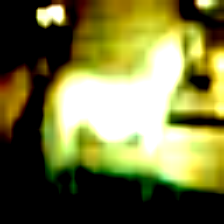

horse


In [ ]:
index = 0

image = cv2.resize(data[0][index].permute(1, 2, 0).numpy()*255, (224, 224))
label = encoder.inverse_transform(data[1])[index]

cv2_imshow(image)
print(label)

# Model Choice, Design & Architecture

In [ ]:
x = torch.rand((5, 3, 32, 32))

## Linear Network

In [ ]:
class Linear_Network(torch.nn.Module):
    def __init__(self, args):
        super(Linear_Network, self).__init__()
        self.args = args
        
        self.fc0 = nn.Linear(in_features=3*32*32, out_features=32*32, bias=True)
        self.bn0 = nn.BatchNorm1d(num_features=32*32)

        self.fc1 = nn.Linear(in_features=32*32, out_features=32*32, bias=True)
        self.bn1 = nn.BatchNorm1d(num_features=32*32)

        self.fc2 = nn.Linear(in_features=32*32, out_features=16*16, bias=True)
        self.bn2 = nn.BatchNorm1d(num_features=16*16)

        self.fc3 = nn.Linear(in_features=16*16, out_features=16*16, bias=True)
        self.bn3 = nn.BatchNorm1d(num_features=16*16)

        self.fc4 = nn.Linear(in_features=16*16, out_features=8*8, bias=True)
        self.bn4 = nn.BatchNorm1d(num_features=8*8)

        self.fc5 = nn.Linear(in_features=8*8, out_features=8*8, bias=True)
        self.bn5 = nn.BatchNorm1d(num_features=8*8)

        self.fc6 = nn.Linear(in_features=8*8, out_features=10, bias=True)

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        
        out = torch.flatten(x, start_dim=1, end_dim=-1) # bs, 3, 32, 32 -> bs, 3*32*32
        out = self.relu(self.bn0(self.fc0(out)))
        out = self.relu(self.bn1(self.fc1(out)))
        out = self.relu(self.bn2(self.fc2(out)))
        out = self.relu(self.bn3(self.fc3(out)))
        out = self.relu(self.bn4(self.fc4(out)))
        out = self.relu(self.bn5(self.fc5(out)))
        out = self.fc6(out)
        
        return out

In [ ]:
linear_network = Linear_Network(args)

out = linear_network(x)
print(out.shape)

NameError: ignored

## Convolutional Neural Network

In [ ]:
class Convolutional_Network(torch.nn.Module):
    def __init__(self, args):
        super(Convolutional_Network, self).__init__()
        self.args = args
        
        self.conv0 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1, bias=True)
        self.bn0 = nn.BatchNorm2d(num_features=64)

        self.conv1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, bias=True)
        self.bn1 = nn.BatchNorm2d(num_features=64)

        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, bias=True)
        self.bn2 = nn.BatchNorm2d(num_features=64)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1, bias=True)
        self.bn3 = nn.BatchNorm2d(num_features=128)

        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1, bias=True)
        self.bn4 = nn.BatchNorm2d(num_features=128)

        self.fc5 = nn.Linear(in_features=128, out_features=256, bias=True)
        self.bn5 = nn.BatchNorm1d(num_features=256)

        self.fc6 = nn.Linear(in_features=256, out_features=10, bias=True)

        self.gap = nn.AvgPool2d(kernel_size=32, stride=1, padding=0, ceil_mode=False)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):

        out = self.relu(self.bn0(self.conv0(x))) # bs, 3, 32, 32 -> bs, 64, 32, 32 | filter: 3*3*3*64 (kernel_size[0]*kernel_size[1]*in_channels*out_channels)
        out = self.relu(self.bn1(self.conv1(out))) # bs, 64, 32, 32 -> bs, 64, 32, 32 | filter: 3*3*64*64
        out = self.relu(self.bn2(self.conv2(out))) # bs, 64, 32, 32 -> bs, 64, 32, 32 | filter: 3*3*64*128
        out = self.relu(self.bn3(self.conv3(out))) # bs, 64, 32, 32 -> bs, 128, 32, 32
        out = self.relu(self.bn4(self.conv4(out))) # bs, 128, 32, 32 -> bs, 128, 32, 32
        out = self.gap(out).squeeze(-1).squeeze(-1) # bs, 128, 32, 32 -> bs, 128, 1, 1 -> bs, 128
        out = self.relu(self.bn5(self.fc5(out))) # bs, 128 -> bs, 256
        out = self.fc6(out) # bs, 256 -> bs, 10

        return out

In [ ]:
convolutional_network = Convolutional_Network(args)

out = convolutional_network(x)
print(out.shape)

NameError: ignored

## VGG

In [ ]:
class VGG(torch.nn.Module):
    def __init__(self, args, features=[64, 64, "M", 128, 128, "M", 256, 256, 256, 256, "M", 512, 512, 512, 512, "M", 512, 512, 512, 512, "M"]):
        super(VGG, self).__init__()
        self.args = args

        self.features = self.make_features(features, batch_norm=True)
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
                                            nn.Linear(in_features=512 * 7 * 7, out_features=4096, bias=True),
                                            nn.ReLU(inplace=True),
                                            nn.Dropout(p=0.5),
                                            nn.Linear(in_features=4096, out_features=4096, bias=True),
                                            nn.ReLU(inplace=True),
                                            nn.Dropout(p=0.5),
                                            nn.Linear(in_features=4096, out_features=10, bias=True),
                                        )
        
    def make_features(self, features, batch_norm=True):
        layers = []
        in_channels = 3
        for layer in features:
            if layer == "M":
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            elif layer == "A":
                layers += [nn.AvgPool2d(kernel_size=2, stride=2)]
            else:
                layer = cast(int, layer)
                conv = nn.Conv2d(in_channels=in_channels, out_channels=layer, kernel_size=3, stride=1, padding=1, bias=True)
                if batch_norm:
                    layers += [conv, nn.BatchNorm2d(layer), nn.ReLU(inplace=True)]
                else:
                    layers += [conv, nn.ReLU(inplace=True)]
                in_channels = layer
        return nn.Sequential(*layers)

    def forward(self, x):

        out = self.features(x)
        out = self.avgpool(out)
        out = torch.flatten(out, start_dim=1, end_dim=-1)
        out = self.classifier(out)

        return out

In [ ]:
vgg = VGG(args)

out = vgg(x)
print(out.shape)

NameError: ignored

### ResNet18

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, downsample):
        super(ResidualBlock, self).__init__()
        
        if downsample:
          self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = 2, padding = 1)
          self.inp = nn.Sequential(nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=2),
                                   nn.BatchNorm2d(out_channels))
        else:
          self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride = 1, padding = 1)
          self.inp = nn.Sequential()

        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu3 = nn.ReLU()
        
    def forward(self, x):
        y = self.inp(x)
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        return self.relu3(out + y)

In [ ]:
class ResNet18(nn.Module):
    def __init__(self):
      super(ResNet18, self).__init__()
      
      self.layer0 = nn.Sequential(nn.Conv2d(3, 64, kernel_size = 7, stride = 2, padding = 3),
                                  nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1),
                                  nn.BatchNorm2d(64),
                                  nn.ReLU())
      
      self.all_res_layers = nn.Sequential(ResidualBlock(64, 64, False),
                                          ResidualBlock(64, 64, False),
                                          ResidualBlock(64, 128, True),
                                          ResidualBlock(128, 128, False),
                                          ResidualBlock(128, 256, True),
                                          ResidualBlock(256, 256, False),
                                          ResidualBlock(256, 512, True),
                                          ResidualBlock(512, 512, False))
      
      self.avgpool = nn.AdaptiveAvgPool2d(1)
      self.fc = nn.Linear(512, 10)

    def forward(self, x):
      out = self.layer0(x)
      out = self.all_res_layers(out)
      out = self.avgpool(out)
      out = out.view(out.size(0), -1)
      out = self.fc(out)
      return out

In [ ]:
from torchsummary import summary

In [ ]:
summary(ResNet18().to(torch.device("cuda:0" if torch.cuda.is_available() else "cpu")), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,472
         MaxPool2d-2             [-1, 64, 8, 8]               0
       BatchNorm2d-3             [-1, 64, 8, 8]             128
              ReLU-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,928
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,928
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
             ReLU-11             [-1, 64, 8, 8]               0
    ResidualBlock-12             [-1, 64, 8, 8]               0
           Conv2d-13             [-1, 64, 8, 8]          36,928
      BatchNorm2d-14             [-1, 6

## Other Architectures

- [ResNet](https://arxiv.org/pdf/1512.03385.pdf)
- [DenseNet](https://arxiv.org/pdf/1608.06993.pdf)

# Trainer

In [ ]:
class Trainer():
    def __init__(self, args, architecture):

        self.args = args

        random.seed(self.args.seed)
        np.random.seed(self.args.seed)
        torch.manual_seed(self.args.seed)
        torch.cuda.manual_seed(self.args.seed)
        torch.cuda.manual_seed_all(self.args.seed)

        self.trainloader, self.validloader, self.testloader = self.get_iterator(self.args.data)
        
        self.model = architecture.to(self.args.device) # self.get_model()
        self.criterion = self.get_criterion()
        self.optimizer = self.get_optimizer()
        self.scheduler = self.get_scheduler()

        self.train_loss = []
        self.train_metrics = {'accuracy': []}
        self.valid_loss = []
        self.valid_metrics = {'accuracy': []}

        self.start_epoch = 0

    def get_iterator(self, data):
        train, valid, test = data
        trainloader = DataLoader(train, batch_size=self.args.batch_size, shuffle=True, num_workers=self.args.num_workers, pin_memory=True, drop_last=True)
        validloader = DataLoader(valid, batch_size=self.args.batch_size, shuffle=False, num_workers=self.args.num_workers, pin_memory=True, drop_last=True)
        testloader = DataLoader(test, batch_size=self.args.batch_size, shuffle=False, num_workers=self.args.num_workers, pin_memory=True, drop_last=False)
        return trainloader, validloader, testloader

    def get_criterion(self):
        return nn.CrossEntropyLoss(weight=weights).to(self.args.device)
    
    def get_optimizer(self):
        return torch.optim.Adam(self.model.parameters(), lr=self.args.lr)

    def get_scheduler(self):
        return torch.optim.lr_scheduler.CosineAnnealingLR(self.optimizer, self.args.max_epochs, eta_min=1e-12, last_epoch=-1, verbose=False)

    def get_model(self, architecture):
        model = Convolutional_Network(args).to(self.args.device)
        return model

    def get_model_params(self):
        return sum(p.numel() for p in self.model.parameters())/1e6

    def get_accuracy(self, output, label):
        return (torch.argmax(output, dim=1)==label).float().sum().item()

    def save(self, epoch):
        torch.save({
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            }, os.path.join(self.args.checkpoint, "model.pth"))
        torch.save({
            'epoch': epoch,
            'args': args,
            'loss': (self.train_loss, self.valid_loss),
            'metrics': (self.train_metrics, self.valid_metrics)
            }, os.path.join(self.args.checkpoint, "metrics.pth"))
        
    def load(self):
        if os.path.exists(os.path.join(self.args.checkpoint, "model.pth")):
            checkpoints = torch.load(os.path.join(self.args.checkpoint, "model.pth"), map_location=self.args.device)
            self.model.load_state_dict(checkpoints['model_state_dict'])
            self.optimizer.load_state_dict(checkpoints['optimizer_state_dict'])

        if os.path.exists(os.path.join(self.args.checkpoint, "metrics.pth")):
            checkpoints = torch.load(os.path.join(self.args.checkpoint, "metrics.pth"), map_location=self.args.device)
            self.args = checkpoints['args']
            self.train_loss, self.valid_loss = checkpoints['loss']
            self.train_metrics, self.valid_metrics = checkpoints['metrics']
            return checkpoints['epoch']
        return 0

    def train(self):
        epoch_loss = 0
        epoch_metrics = {'accuracy': 0}

        gc.collect()
        torch.cuda.empty_cache()
        self.model.train()

        with torch.autograd.set_detect_anomaly(True):
            bar = pyprind.ProgBar(len(self.trainloader), bar_char='█')
            for index, (data, label) in enumerate(self.trainloader):
                data = data.to(self.args.device).float()
                label = label.long().to(self.args.device)

                self.optimizer.zero_grad()
                
                output = self.model(data)

                loss = self.criterion(output, label)

                loss.backward()

                self.optimizer.step()

                epoch_loss += loss.item()/len(self.trainloader)

                epoch_metrics['accuracy'] += self.get_accuracy(output, label)/len(self.args.data[0])

                bar.update()
                gc.collect()
                torch.cuda.empty_cache()

        return epoch_loss, epoch_metrics

    def evaluate(self):
        epoch_loss = 0
        epoch_metrics = {'accuracy': 0}

        gc.collect()
        torch.cuda.empty_cache()
        self.model.eval()

        with torch.autograd.set_detect_anomaly(True):
            with torch.no_grad():
                bar = pyprind.ProgBar(len(self.validloader), bar_char='█')
                for index, (data, label) in enumerate(self.validloader):
                    data = data.to(self.args.device).float()
                    label = label.long().to(self.args.device)

                    output = self.model(data)

                    loss = self.criterion(output, label)

                    epoch_loss += loss.item()/len(self.validloader)
                    epoch_metrics['accuracy'] += self.get_accuracy(output, label)/len(self.args.data[1])

                    bar.update()
                    gc.collect()
                    torch.cuda.empty_cache()

        return epoch_loss, epoch_metrics

    def test(self):

        gc.collect()
        torch.cuda.empty_cache()
        self.model.eval()

        outputs = torch.empty([0,])

        with torch.autograd.set_detect_anomaly(True):
            with torch.no_grad():
                bar = pyprind.ProgBar(len(self.testloader), bar_char='█')
                for index, (data, label) in enumerate(self.testloader):
                    data = data.to(self.args.device)

                    output = torch.argmax(self.model(data)).detach().cpu()
                    outputs = torch.cat((outputs, output), dim=0)

                    bar.update()
                    gc.collect()
                    torch.cuda.empty_cache()

        return outputs
    
    def fit(self, next=True):
        if next:
            self.start_epoch = self.load()

        for epoch in range(self.start_epoch+1, self.args.max_epochs+1, 1):

            epoch_train_loss, epoch_train_metrics = self.train()
            epoch_train_accuracy = epoch_train_metrics['accuracy']

            self.train_loss.append(epoch_train_loss)
            self.train_metrics['accuracy'].append(epoch_train_metrics['accuracy'])

            epoch_valid_loss, epoch_valid_metrics = self.evaluate()
            epoch_valid_accuracy = epoch_valid_metrics['accuracy']

            
            self.valid_loss.append(epoch_valid_loss)
            self.valid_metrics['accuracy'].append(epoch_valid_metrics['accuracy']) 

            self.scheduler.step()
            for param_group in self.optimizer.param_groups:
                self.args.lr = param_group['lr']
            if epoch_valid_metrics['accuracy'] >= max(self.valid_metrics['accuracy']):
                self.save(epoch)

            time.sleep(1)
            print(f'Epoch {epoch}/{self.args.max_epochs} | Training: Loss = {round(epoch_train_loss, 4)}  Accuracy = {round(epoch_train_accuracy, 4)} | Validation: Loss = {round(epoch_valid_loss, 4)}  Accuracy = {round(epoch_valid_accuracy, 4)}')

# Training

In [ ]:
models = {
    'Linear': Linear_Network(args),
    'Convolution': Convolutional_Network(args),
    'VGG': VGG(args),
    'ResNet18': ResNet18()
}

In [ ]:
trainer = Trainer(args, architecture=models['ResNet18'])

In [ ]:
trainer.fit()

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:14
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


Epoch 1/10 | Training: Loss = 1.3957  Accuracy = 0.4944 | Validation: Loss = 1.1567  Accuracy = 0.5822


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:07
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


Epoch 2/10 | Training: Loss = 1.017  Accuracy = 0.6396 | Validation: Loss = 0.9938  Accuracy = 0.654


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:08
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


Epoch 3/10 | Training: Loss = 0.8123  Accuracy = 0.7132 | Validation: Loss = 0.864  Accuracy = 0.694


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:07
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


Epoch 4/10 | Training: Loss = 0.6534  Accuracy = 0.7698 | Validation: Loss = 0.8796  Accuracy = 0.706


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:09
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


Epoch 5/10 | Training: Loss = 0.4858  Accuracy = 0.8295 | Validation: Loss = 0.8669  Accuracy = 0.7068


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:10
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


Epoch 6/10 | Training: Loss = 0.3146  Accuracy = 0.8896 | Validation: Loss = 0.9134  Accuracy = 0.7242


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:10
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


Epoch 7/10 | Training: Loss = 0.1685  Accuracy = 0.9429 | Validation: Loss = 0.9805  Accuracy = 0.729


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:08
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


Epoch 8/10 | Training: Loss = 0.0729  Accuracy = 0.9773 | Validation: Loss = 1.1862  Accuracy = 0.7292


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:07
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


Epoch 9/10 | Training: Loss = 0.0286  Accuracy = 0.9918 | Validation: Loss = 1.3543  Accuracy = 0.7352


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:08
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


Epoch 10/10 | Training: Loss = 0.0146  Accuracy = 0.9963 | Validation: Loss = 1.3681  Accuracy = 0.7396


## Statistics

| **Model** | **Time** per Epoch |  **Accuracy** (At end of Epoch 1) | **Accuracy** (At end of Epoch 10) |
| :-- | :-- | :-- | :-- |
| Linear | 1 min 20 s| 46.14 % | 58.28 % |
| Convolution | 1 min 50 s | 55.24 % | 81.32 % |
| VGG19 | 3 mins | 27.08 % | 79.6 % |
| ResNet152 | 6 mins 10 s| 37.5 % | 62.12 % |
| ResNet152 (Pretrained) | 6 mins 40 s| 78.66 % | 85.98 % |

